In [3]:
%pip install fidle

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib
from importlib import reload


# Données et traitement : 

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [10]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
# image de 28pxl par 28pxl
# reshape les données pour qu'elles soient compatibles avec les modèles CNN
# paramètre du reshape : -1 pour garder le nombre d'échantillons, 28, 28 pour les dimensions de l'image, 1 pour la profondeur (canal unique pour les images en niveaux de gris)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("x_train shape after reshape:", x_train.shape)
print("x_test shape after reshape:", x_test.shape)


x_train shape after reshape: (60000, 28, 28, 1)
x_test shape after reshape: (10000, 28, 28, 1)


In [12]:
# On prépare nos données 
print("Avant normalisation: Min = {}, Max = {}".format(np.min(x_train), np.max(x_train)))

# Normalisation des données
x_max = x_train.max()
x_train = x_train / x_max
x_test = x_test / x_max

print("Après normalisation: Min = {}, Max = {}".format(np.min(x_train), np.max(x_train)))

Avant normalisation: Min = 0, Max = 255
Après normalisation: Min = 0.0, Max = 1.0


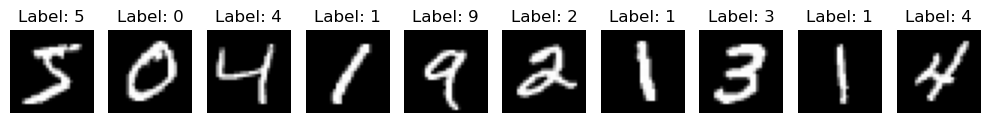

In [18]:
# On définit une fonction pour afficher les images
def display_images(images, labels, n=10):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Affichage des 10 premières images d'entraînement
display_images(x_train, y_train, n=10)

# Création du Modèle : 

In [19]:
# On définit la taille des couches cachées:
hidden1 = 100
hidden2 = 100

# Création du Modèle Séquentiel : 
model = keras.models.Sequential()

# Ajout de la couche d'entrée qui prend des images de 28x28 pixels avec 1 canal (niveaux de gris)
# en soit des tableau de 28 par 28 avec un vecteur de dimension 1
model.add( keras.layers.Input(shape=(28, 28, 1)) )

# On met une couche de convolution 2D avec 8 filtres de taille 3x3, activation ReLU
model.add( keras.layers.Conv2D(8, (3,3), activation='relu'))
# On ajoute une couche de pooling pour réduire la taille des caractéristiques
model.add( keras.layers.MaxPooling2D((2,2)) )
# On ajoute un dropout pour éviter le sur-apprentissage : On remet ces 20% des neurones aléatoirement à 0
model.add( keras.layers.Dropout(0.2) )

# On ajoute une deuxième couche de convolution 2D avec 16 filtres de taille 3x3, activation ReLU
model.add( keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add( keras.layers.MaxPooling2D((2,2)) )
model.add( keras.layers.Dropout(0.2) )

# On aplatit les données pour les connecter à une couche dense
# Pourquoi on en fait pas plus ? parce que les images obtenues par convolution sont trop petites : 
# Comme on fait pas de padding par défaut, on perd de l'information à chaque convolution + on réduit la taille avec le pooling donc on a pas assez de données pour faire plus de couches
model.add( keras.layers.Flatten() )
# On ajoute une couche dense avec 100 neurones et activation ReLU
model.add( keras.layers.Dense(hidden1, activation='relu') )
model.add( keras.layers.Dropout(0.5) )

model.add( keras.layers.Dense(10, activation='softmax') )


In [21]:
#permet de visualiser le modèle
model.summary()
# compilation du modèle
# On utilise l'optimiseur Adam, la fonction de perte sparse_categorical_crossentropy (car les étiquettes sont des entiers) et la métrique d'exactitude
# Note: sparse_categorical_crossentropy est utilisé pour les étiquettes entières, tandis que categorical_crossentropy est utilisé pour les étiquettes one-hot encodées.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,358 (165.46 KB)

 Trainable params: 42,358 (165.46 KB)

 Non-trainable params: 0 (0.00 B)

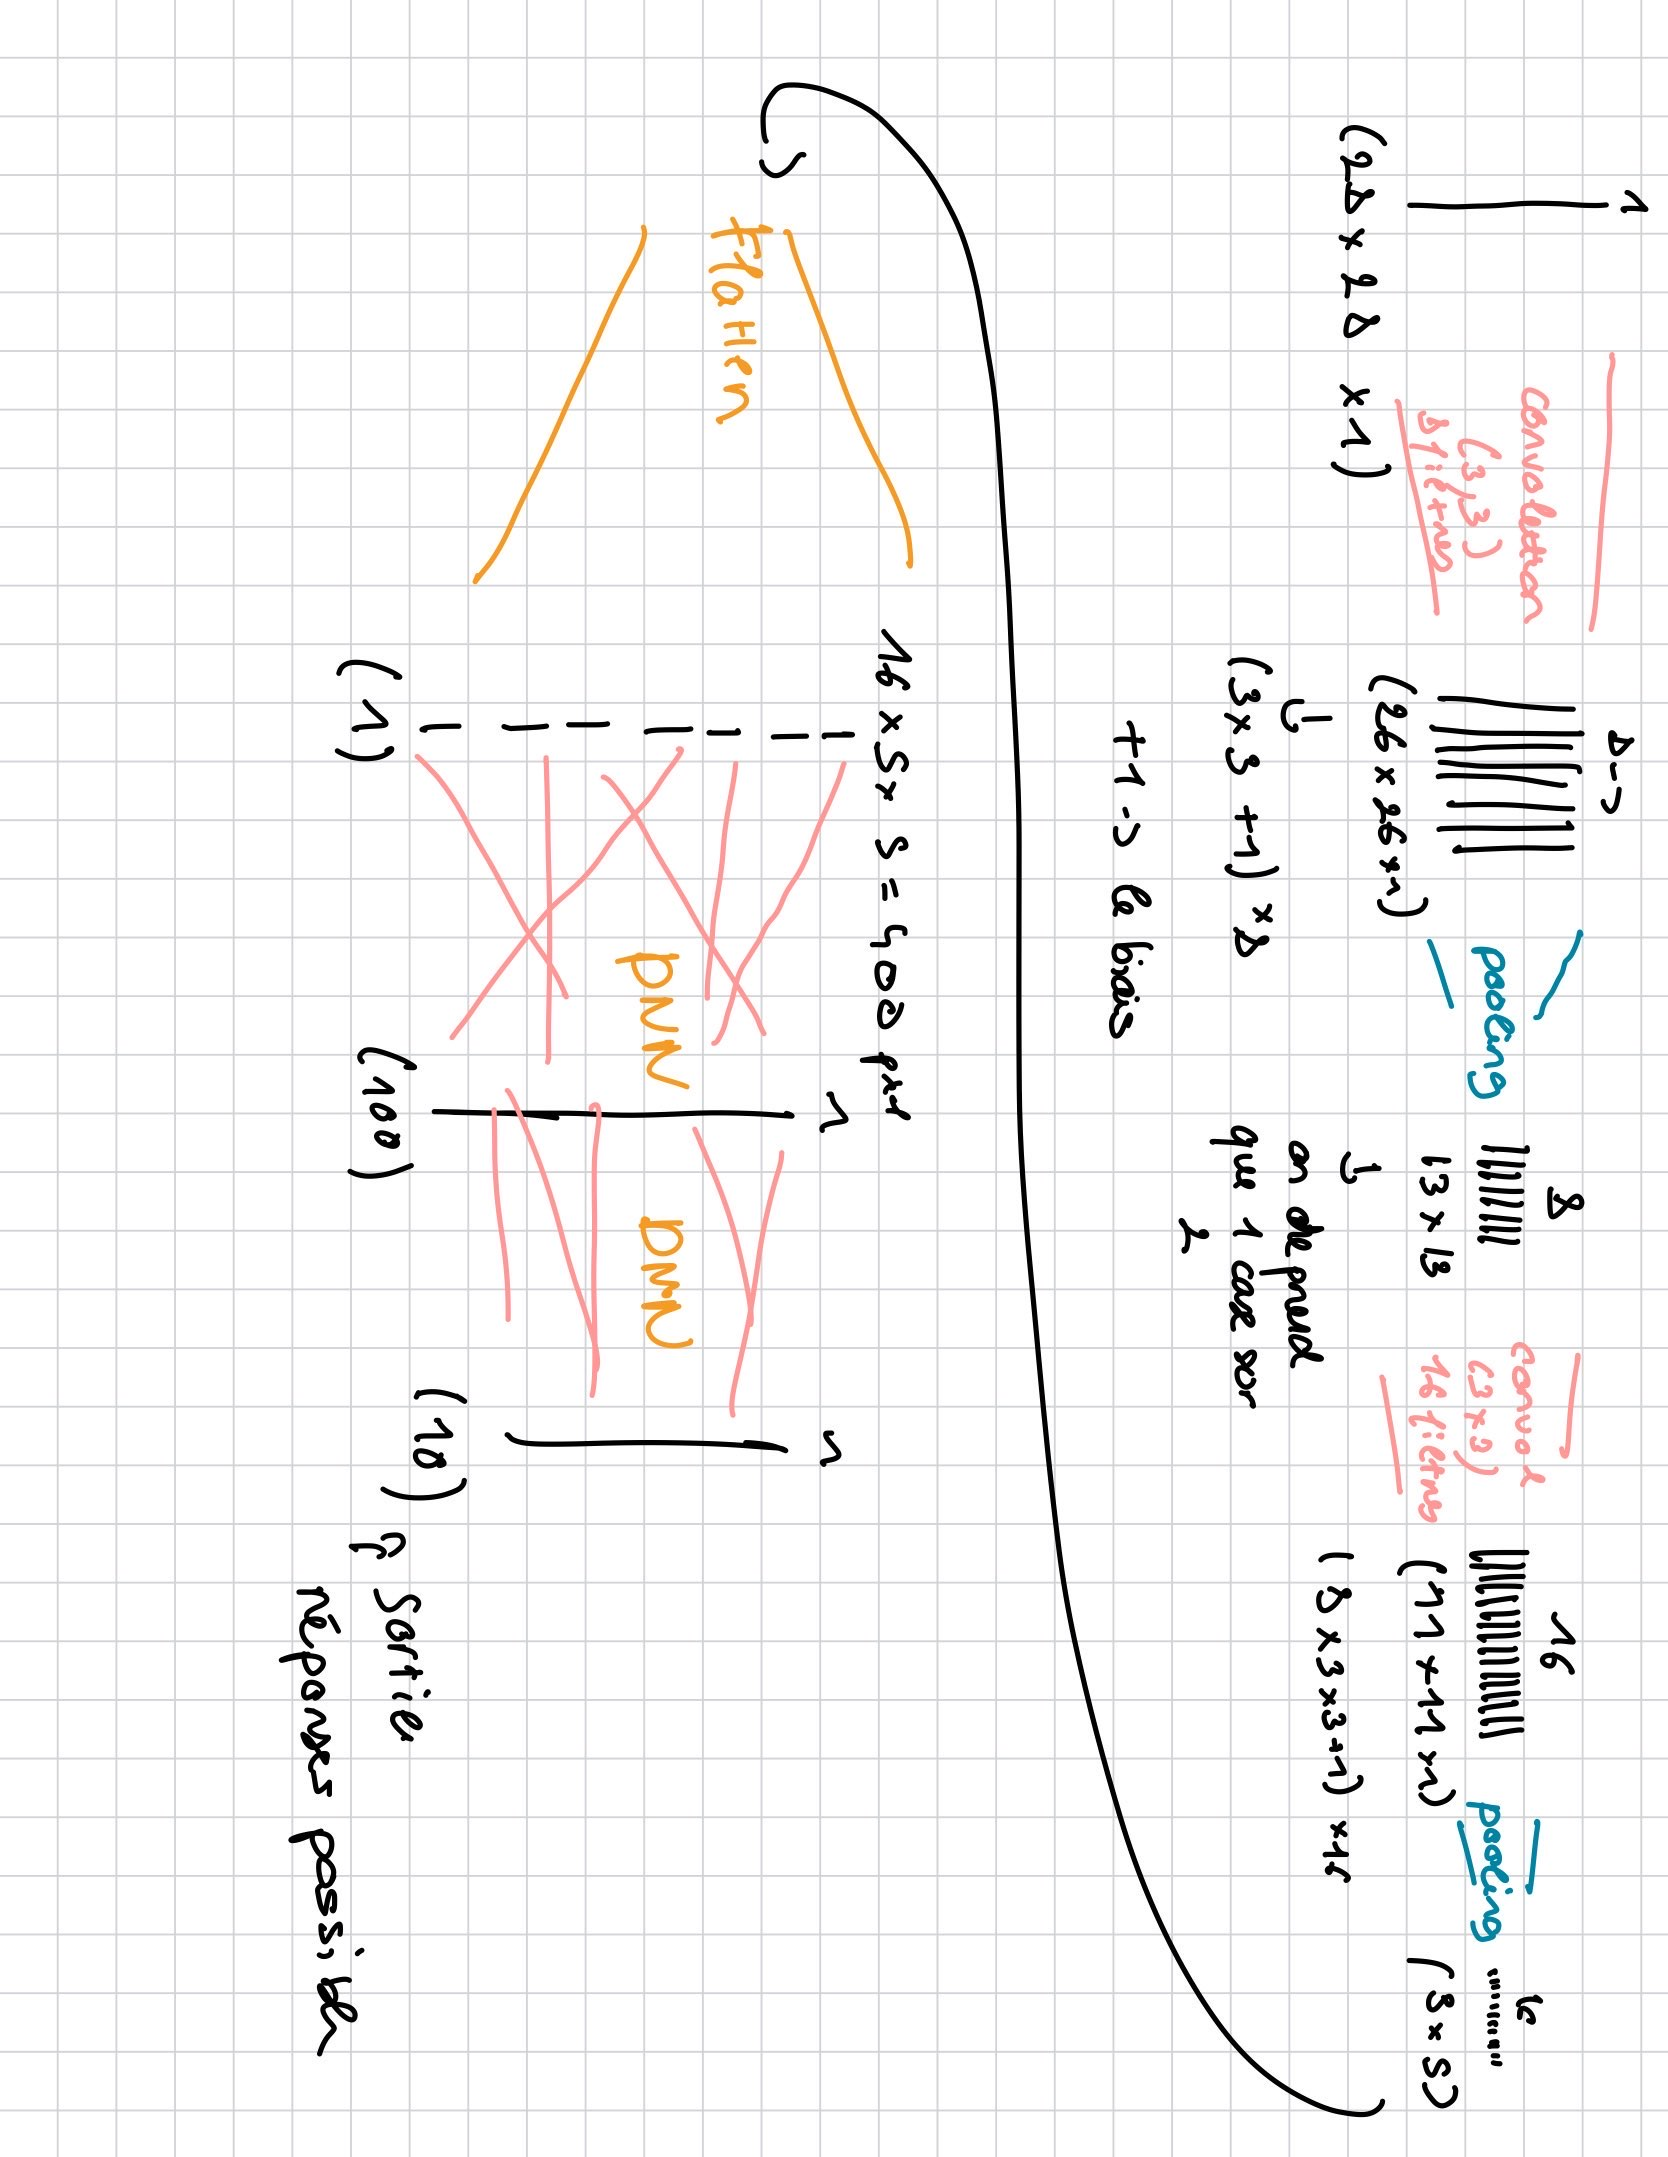

# Entrainement du modèle

In [22]:
# Entrainement du modèle, 
# le batch size sert a diviser les données en petits lots pour l'entraînement, ce qui permet une mise à jour plus fréquente des poids du modèle
# epochs est le nombre de fois que le modèle va passer sur l'ensemble des données d'entraînement
batch_size = 512
epochs = 16

# Entraînement du modèle
# la validation_data permet de suivre la performance du modèle sur les données de test pendant l'entraînement
history = model.fit( x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4386 - loss: 1.6387 - val_accuracy: 0.9289 - val_loss: 0.2817
Epoch 2/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8616 - loss: 0.4437 - val_accuracy: 0.9545 - val_loss: 0.1564
Epoch 3/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9069 - loss: 0.3037 - val_accuracy: 0.9662 - val_loss: 0.1155
Epoch 4/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9278 - loss: 0.2394 - val_accuracy: 0.9701 - val_loss: 0.0967
Epoch 5/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9365 - loss: 0.2063 - val_accuracy: 0.9751 - val_loss: 0.0831
Epoch 6/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9429 - loss: 0.1864 - val_accuracy: 0.9763 - val_loss: 0.0767
Epoch 7/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9478 - loss: 0.1730 - val_accuracy: 0.9775 - val_loss: 0.0693
Epoch 8/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9491 - loss: 0.1638 - val_accuracy: 

# Evaluation

In [23]:
# Final loss and accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04308411106467247
Test accuracy: 0.9850000143051147


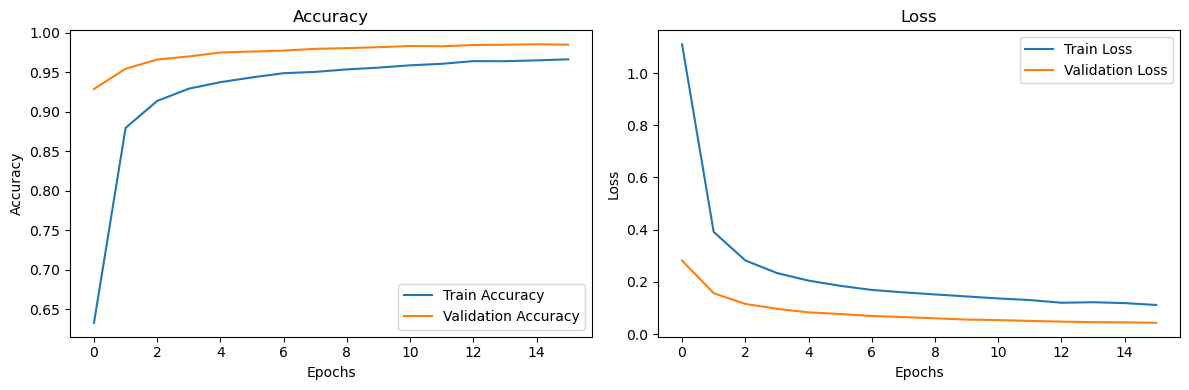

In [24]:
# On veut plot history
import matplotlib.pyplot as plt
# Plot de l'historique de l'entraînement
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


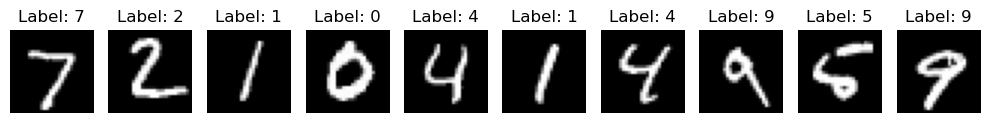

In [25]:
# On veut plot les résultats de la prédiction

y__sigmoid = model.predict(x_test)
y_pred = np.argmax(y__sigmoid, axis=-1)

# On affiche les 10 premières images de test avec leurs prédictions
display_images(x_test, y_pred, n=10)
# On veut sauvegarder le modèle

Nombre d'erreurs : 150


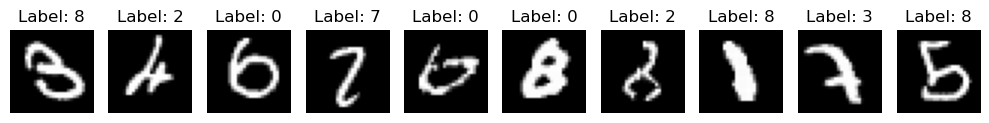

In [28]:
# On affiche les erreurs qu'il a pu faire 
errors = np.where(y_pred != y_test)[0]
print(f"Nombre d'erreurs : {len(errors)}")

# On veut en display certaine avec display_image :
# Récupérer les images et prédictions où il y a des erreurs
error_images = x_test[errors]
error_predictions = y_pred[errors]
error_true_labels = y_test[errors]

# Créer des labels combinés pour afficher prédiction vs vraie valeur
error_labels = [f"{pred}" for pred, true in zip(error_predictions, error_true_labels)]

# Afficher les 10 premières erreurs
display_images(error_images, error_labels, n=10)


Image d'exemple à l'index 0:
Classe prédite: 7
Confiance: 100.00%
Vraie classe: 7

Probabilités pour chaque classe:
Classe 0: 0.00%
Classe 1: 0.00%
Classe 2: 0.00%
Classe 3: 0.00%
Classe 4: 0.00%
Classe 5: 0.00%
Classe 6: 0.00%
Classe 7: 100.00%
Classe 8: 0.00%
Classe 9: 0.00%


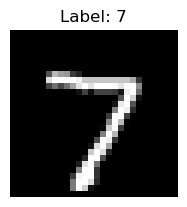

In [29]:
# On veut récupérer le % de fiabilité pour une donnée prédite 

# Prendre un exemple de prédiction
index_exemple = 0
image_exemple = x_test[index_exemple:index_exemple+1]

# Obtenir les probabilités pour cette image
probabilites = model.predict(image_exemple, verbose=0)
classe_predite = np.argmax(probabilites)
confiance = np.max(probabilites) * 100

print(f"Image d'exemple à l'index {index_exemple}:")
print(f"Classe prédite: {classe_predite}")
print(f"Confiance: {confiance:.2f}%")
print(f"Vraie classe: {y_test[index_exemple]}")

# Afficher toutes les probabilités pour cette prédiction
print("\nProbabilités pour chaque classe:")
for i, prob in enumerate(probabilites[0]):
    print(f"Classe {i}: {prob*100:.2f}%")

# Afficher l'image
display_images(image_exemple, [classe_predite], n=1)


Image d'exemple à l'index 18:
Classe prédite: 8
Vraie classe: 3

Probabilités pour chaque classe:
Classe 0: 0.10%
Classe 1: 0.04%
Classe 2: 1.78%
Classe 3: 24.21%
Classe 4: 0.09%
Classe 5: 14.93%
Classe 6: 0.76%
Classe 7: 0.10%
Classe 8: 57.54%
Classe 9: 0.46%


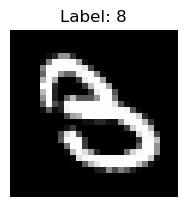

In [31]:
# On fait pareil pour l'une mal devinée :
index_exemple = 0
image_exemple = x_test[errors[index_exemple]:errors[index_exemple]+1]
# Obtenir les probabilités pour cette image
probabilites = model.predict(image_exemple, verbose=0)
classe_predite = np.argmax(probabilites)
print(f"Image d'exemple à l'index {errors[index_exemple]}:")
print(f"Classe prédite: {classe_predite}")
print(f"Vraie classe: {y_test[errors[index_exemple]]}")
# Afficher toutes les probabilités pour cette prédiction
print("\nProbabilités pour chaque classe:")
for i, prob in enumerate(probabilites[0]):
    print(f"Classe {i}: {prob*100:.2f}%")

display_images(image_exemple, [classe_predite], n=1)

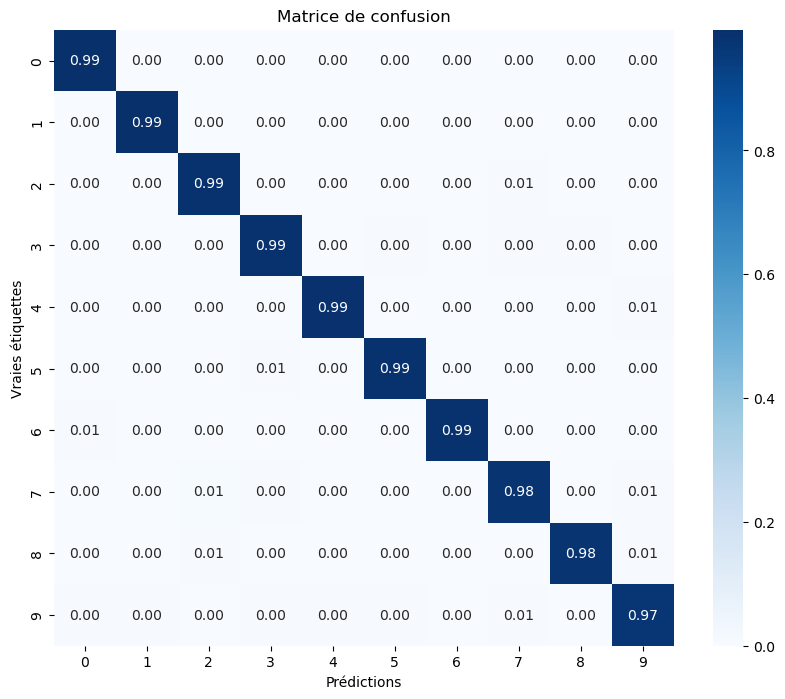

In [35]:
# On veut print la matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()